In [1]:
import numpy as np
import pandas as pd
import os
import json

In [2]:
ea_data = pd.read_csv(r"C:\Users\nandi\Documents\ML_CO2_ER\data\filtered_ea_clean.csv")

# ea_data = pd.read_csv(r"filtered_ea_clean.csv")
ea_data.dropna(inplace=True)
ea_data.rename(columns={'solvent ID': 'solvent_ID', 'EA_0-1': 'EA_values'}, inplace=True)

In [3]:
ea_data.head()

,solvent_ID,smiles,EA_values
0,zinc_1345620175,C[C@H](N[C@@H]1CCCC[C@H]1F)[C@@H](C)O,-5.118749
1,zinc_674912368,COC[C@H](C)N1C[C@@H]2CCC[C@H]2C1,-4.129380
2,zinc_644654185,CC[C@@H](O)CNCC(C)(F)F,-4.700916
3,zinc_132906027,CC[C@@H](NCCOCC(C)C)C1CC1,-4.305889
4,zinc_156549661,C[C@H](O)CN1CCC[C@H]1C,-5.431978


In [5]:
df = pd.read_csv(r"C:\Users\nandi\Documents\ML_CO2_ER\data\df_merged.csv")
# df = pd.read_csv(r"C:\Users\nandi\Documents\ML_CO2_ER\data\df_filtered_ea.csv")

In [6]:
df.head()

,solvent_ID,smiles,Binding_Energy_eV,solubility_CO2 [mol/L],viscosity [Pa s],nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,...,lumo_eV,homo_lumo_gap_eV,polarizability_ang3,min_partial_charge,max_partial_charge,min_abs_partial_charge,max_abs_partial_charge,vib_freq_min_cm1,vib_freq_max_cm1,vib_freq_count
0,zinc_5593217,COCCNC(=O)[C@@H](CC)C,-0.246414,0.097848,0.011764,0.0,0.0,12.906117,2.122425,4.244850,...,-6.330932,181.930993,748.130500,-0.832151,0.392923,0.034817,0.832151,23.0414,3627.7857,78.0
1,zinc_400210175,CO[C@H](C1CC1)CN1CCCCC1,-0.239933,0.117575,0.007448,0.0,1.0,17.343700,2.348592,4.557405,...,1.910386,161.701629,933.997796,-1.140739,0.562172,0.001836,1.140739,28.8558,3225.7980,96.0
2,zinc_5696920,NOCCN(C)C,-0.219656,0.097619,0.002281,0.0,1.0,7.727407,1.931852,3.863703,...,4.894440,168.343554,496.654099,-0.802413,0.379028,0.149089,0.802413,52.1440,3517.7383,51.0
3,zinc_685002938,C[C@@H](CN(CC1CC1)CC(F)F)O,-0.325154,0.088216,0.025603,0.0,1.0,14.943352,2.294945,4.451333,...,-1.984432,171.357226,807.127445,-0.794729,0.647513,0.076133,0.794729,26.9357,3729.3970,84.0
4,zinc_52602135,CNC[C@@H](C(C)C)OC,-0.288984,0.131763,0.001110,0.0,1.0,10.199109,2.119166,4.238332,...,2.317639,167.803019,655.958528,-0.847175,0.397601,0.172656,0.847175,62.5690,3522.0361,72.0


In [6]:
df.describe()

,Binding_Energy_eV,solubility_CO2 [mol/L],viscosity [Pa s],nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,...,lumo_eV,homo_lumo_gap_eV,polarizability_ang3,min_partial_charge,max_partial_charge,min_abs_partial_charge,max_abs_partial_charge,vib_freq_min_cm1,vib_freq_max_cm1,vib_freq_count
count,2892.000000,2892.000000,2892.000000,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,...,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000
mean,-0.226497,0.109384,0.018793,0.000692,0.859467,12.830105,2.201217,4.333392,12.830105,1.180572,...,-1.224947,169.007310,756.432951,-0.804508,0.470508,0.063215,0.823917,43.145628,3484.597621,79.275528
std,0.043989,0.030934,0.056408,0.026307,0.415649,2.619000,0.132307,0.226673,2.619000,0.066040,...,5.634643,13.912027,167.050409,0.158810,0.226297,0.052213,0.173234,28.784840,239.785296,18.692017
min,-0.571607,0.017455,0.000138,0.000000,0.000000,4.000000,1.618034,3.236068,4.000000,0.800000,...,-78.103708,122.235118,203.780390,-1.944315,0.199493,0.000041,0.323770,7.184400,2432.733000,7.000000
25%,-0.240058,0.089044,0.001710,0.000000,1.000000,11.178986,2.116883,4.197082,11.178986,1.138367,...,-3.465352,160.694604,642.498493,-0.882881,0.354582,0.020801,0.717618,27.305500,3221.647100,66.000000
50%,-0.218609,0.102650,0.004317,0.000000,1.000000,13.305928,2.214320,4.350655,13.305928,1.180834,...,-0.399848,166.995917,783.587582,-0.813565,0.448350,0.049530,0.825256,36.036900,3505.448100,81.000000
75%,-0.201010,0.120372,0.016135,0.000000,1.000000,14.833472,2.296929,4.491654,14.833472,1.229189,...,2.117715,173.697079,880.500115,-0.706313,0.491961,0.093065,0.897781,48.925300,3725.907400,93.000000
max,-0.073876,0.366304,2.037669,1.000000,2.000000,18.227421,2.663123,4.939098,18.227421,1.398294,...,11.358655,231.675088,1091.131154,-0.323770,2.197333,0.564214,2.197333,374.040100,3805.516500,117.000000


In [7]:
df = df.merge(ea_data, on=['solvent_ID'], how="right")


In [8]:
df.head()

,solvent_ID,smiles_x,Binding_Energy_eV,solubility_CO2 [mol/L],viscosity [Pa s],nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,...,polarizability_ang3,min_partial_charge,max_partial_charge,min_abs_partial_charge,max_abs_partial_charge,vib_freq_min_cm1,vib_freq_max_cm1,vib_freq_count,smiles_y,EA_values
0,zinc_1345620175,C[C@H]([C@@H](N[C@@H]1CCCC[C@H]1F)C)O,-0.214742,0.079341,0.150835,0.0,1.0,15.711170,2.269900,4.539800,...,849.696107,-0.819411,0.453256,0.172385,0.819411,51.2361,3727.7322,93.0,C[C@H](N[C@@H]1CCCC[C@H]1F)[C@@H](C)O,-5.118749
1,zinc_674912368,COC[C@@H](N1C[C@H]2[C@H](C1)CCC2)C,-0.214342,0.094735,0.011400,0.0,1.0,16.309342,2.417049,4.559183,...,924.031534,-0.779818,0.232699,0.000737,0.779818,35.7164,3128.8524,96.0,COC[C@H](C)N1C[C@@H]2CCC[C@H]2C1,-4.129380
2,zinc_644654185,CC[C@H](CNCC(F)(F)C)O,-0.212998,0.096515,0.022542,0.0,1.0,11.751232,2.135779,4.271558,...,666.772267,-0.824957,0.633432,0.059057,0.824957,43.3486,3716.1399,72.0,CC[C@@H](O)CNCC(C)(F)F,-4.700916
3,zinc_132906027,CC[C@H](C1CC1)NCCOCC(C)C,-0.215950,0.079947,0.004861,0.0,1.0,17.214239,2.324807,4.407461,...,1044.297027,-0.927964,0.380666,0.011509,0.927964,22.3711,3510.5041,111.0,CC[C@@H](NCCOCC(C)C)C1CC1,-4.305889
4,zinc_156549661,C[C@@H](CN1CCC[C@H]1C)O,-0.198320,0.088578,0.081929,0.0,1.0,11.731206,2.268815,4.387099,...,709.790668,-0.610850,0.449006,0.051486,0.610850,43.4119,3722.5285,75.0,C[C@H](O)CN1CCC[C@H]1C,-5.431978


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3075 entries, 0 to 3074
Columns: 1422 entries, solvent_ID to EA_values
dtypes: float64(1419), object(3)
memory usage: 33.4+ MB


In [10]:
df.rename(columns={'smiles_x': 'smiles'}, inplace=True)
df.drop("smiles_y", inplace=True, axis=1)

In [11]:
len(df["EA_values"])

3075

In [12]:
# for col in df.columns:
#     if df[col] == float or type(df[col]) == int:
#         df[col] = df[col].fillna(df[col].mean())
#     elif type(df[col]) == str:
#         df[col] = df[col].fillna(df[col].mode())

In [13]:
df.isna().sum()

solvent_ID                  0
smiles                    207
Binding_Energy_eV         207
solubility_CO2 [mol/L]    207
viscosity [Pa s]          207
                         ... 
max_abs_partial_charge    210
vib_freq_min_cm1          210
vib_freq_max_cm1          210
vib_freq_count            210
EA_values                   0
Length: 1421, dtype: int64

In [14]:
df.dropna(inplace=True)

In [15]:
meta_cols = ['solvent_ID', 'smiles', 'solubility_CO2 [mol/L]', 'viscosity [Pa s]', 'Binding_Energy_eV']
target = 'EA_values'  # or 'solubility_CO2 [mol/L]', 'viscosity [Pa s]'
X = df.drop(columns=meta_cols + [target])
y = df[target]

<Axes: >

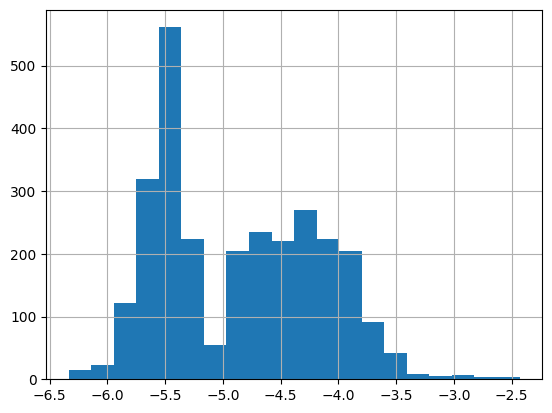

In [16]:
y.hist(bins=20)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# from sklearn.preprocessing import QuantileTransformer
# qt = QuantileTransformer(output_distribution='normal')
# y_train_trans = qt.fit_transform(y_train.values.reshape(-1, 1)).flatten()

In [19]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')  # works with negatives too
y_train_trans = pt.fit_transform(y_train.values.reshape(-1, 1)).flatten()

<Axes: ylabel='Count'>

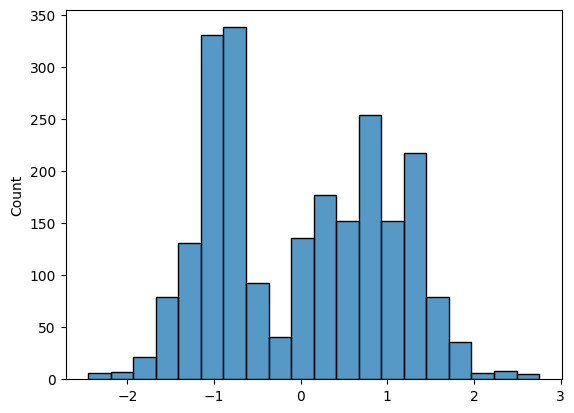

In [20]:
import seaborn as sns
sns.histplot(y_train_trans, bins = 20)

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# y_scaler = StandardScaler()
# y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()
# y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1)).flatten()

# 4. Model Training
# model = RandomForestRegressor(n_estimators=100, random_state=42)
# model.fit(X_train_scaled, y_train_log)

In [23]:
pd.DataFrame(X_train_scaled, columns=X_test.columns).describe()

,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,VE1_A,VE2_A,...,lumo_eV,homo_lumo_gap_eV,polarizability_ang3,min_partial_charge,max_partial_charge,min_abs_partial_charge,max_abs_partial_charge,vib_freq_min_cm1,vib_freq_max_cm1,vib_freq_count
count,2.268000e+03,2.268000e+03,2.268000e+03,2.268000e+03,2.268000e+03,2.268000e+03,2.268000e+03,2.268000e+03,2.268000e+03,2.268000e+03,...,2.268000e+03,2.268000e+03,2.268000e+03,2.268000e+03,2.268000e+03,2.268000e+03,2.268000e+03,2.268000e+03,2.268000e+03,2.268000e+03
mean,-3.132904e-18,9.007100e-17,2.130375e-16,-1.409807e-17,5.623564e-16,2.318349e-16,9.939139e-16,2.506324e-17,-8.035900e-16,-1.566452e-18,...,-1.566452e-17,-4.057111e-16,3.837808e-16,2.334014e-16,-1.950233e-16,-1.409807e-17,-4.934325e-17,-8.772133e-17,-9.758997e-16,3.790814e-16
std,1.000221e+00,1.000221e+00,1.000221e+00,1.000221e+00,1.000221e+00,1.000221e+00,1.000221e+00,1.000221e+00,1.000221e+00,1.000221e+00,...,1.000221e+00,1.000221e+00,1.000221e+00,1.000221e+00,1.000221e+00,1.000221e+00,1.000221e+00,1.000221e+00,1.000221e+00,1.000221e+00
min,-2.970880e-02,-2.091284e+00,-3.429736e+00,-3.567392e+00,-3.872504e+00,-3.429736e+00,-5.813733e+00,-3.985426e+00,-3.271827e+00,-2.061013e+00,...,-8.111090e+00,-3.334160e+00,-3.020061e+00,-7.232152e+00,-1.233082e+00,-1.234102e+00,-2.977981e+00,-1.279106e+00,-1.707595e+00,-3.164968e+00
25%,-2.970880e-02,3.298657e-01,-6.395557e-01,-6.312861e-01,-5.979713e-01,-6.395557e-01,-6.462644e-01,-5.502276e-01,-6.156815e-01,-6.836274e-01,...,-4.328368e-01,-5.993306e-01,-6.865143e-01,-4.948429e-01,-5.185663e-01,-8.276021e-01,-6.145064e-01,-5.574387e-01,-1.114572e+00,-7.290553e-01
50%,-2.970880e-02,3.298657e-01,1.901948e-01,9.041695e-02,7.058352e-02,1.901948e-01,4.584617e-03,3.035389e-01,1.645003e-01,-2.614176e-01,...,1.482353e-01,-1.386832e-01,1.601047e-01,-5.724466e-02,-9.136865e-02,-2.546851e-01,1.016002e-02,-2.491870e-01,7.878511e-02,1.641126e-01
75%,-2.970880e-02,3.298657e-01,7.487282e-01,7.125290e-01,6.901055e-01,7.487282e-01,7.413785e-01,7.142035e-01,7.607708e-01,4.045099e-01,...,6.179120e-01,3.232849e-01,7.442317e-01,6.079113e-01,1.072628e-01,5.835108e-01,4.443440e-01,2.128516e-01,1.001277e+00,7.324922e-01
max,3.366007e+01,2.751016e+00,2.081023e+00,3.494403e+00,2.687772e+00,2.081023e+00,3.320803e+00,1.891866e+00,2.268835e+00,4.136773e+00,...,2.359382e+00,4.473602e+00,1.986753e+00,3.047584e+00,6.151169e+00,2.968782e+00,6.714248e+00,1.194909e+01,1.338949e+00,2.031645e+00


In [24]:
X_train_scaled.shape
X_train_scaled[:4]

array([[-0.0297088 , -2.09128441, -1.85922245, ...,  0.76781618,
        -1.52754043, -1.21623777],
       [-0.0297088 , -2.09128441, -0.2595387 , ..., -0.75438206,
         0.53126835, -0.07947862],
       [-0.0297088 , -2.09128441,  0.30630233, ..., -0.60889757,
         0.51690027, -0.56666111],
       [-0.0297088 , -2.09128441, -1.6792752 , ..., -0.66975319,
        -0.9211993 , -1.0538436 ]], shape=(4, 1415))

In [25]:
X_train.shape
X_train.values

array([[0.00000000e+00, 0.00000000e+00, 8.05467898e+00, ...,
        6.39514000e+01, 3.12496840e+03, 5.70000000e+01],
       [0.00000000e+00, 0.00000000e+00, 1.21846678e+01, ...,
        2.17365000e+01, 3.61376090e+03, 7.80000000e+01],
       [0.00000000e+00, 0.00000000e+00, 1.36455298e+01, ...,
        2.57712000e+01, 3.61034970e+03, 6.90000000e+01],
       ...,
       [0.00000000e+00, 1.00000000e+00, 1.35384665e+01, ...,
        3.67351000e+01, 3.46386380e+03, 9.00000000e+01],
       [0.00000000e+00, 0.00000000e+00, 1.38392323e+01, ...,
        3.01630000e+01, 3.18300250e+03, 7.20000000e+01],
       [0.00000000e+00, 1.00000000e+00, 8.26112544e+00, ...,
        5.88732000e+01, 3.76662250e+03, 3.60000000e+01]],
      shape=(2268, 1415))

In [26]:
# from sklearn.model_selection import RandomizedSearchCV
# # # XGB model with GPU support
# from xgboost import XGBRegressor
# xgb = XGBRegressor(
#     tree_method='hist',  # key line for GPU
#     #device='cuda', 
#     random_state=42
# )

# param_dist = {
#     'n_estimators': [100, 200, 300, 500, 700],
#     'max_depth': [3, 6, 8, 10, 12],
#     'learning_rate': [0.01, 0.05, 0.1, 0.5],
#     'subsample': [0.6, 0.8, 1.0],
#     'colsample_bytree': [0.6, 0.8, 1.0],
#     'reg_lambda': [0.1, 0.5, 1, 5]
# }


# # # RandomizedSearchCV with GPU-based XGBoost
# random_search = RandomizedSearchCV(
#     estimator=xgb,
#     param_distributions=param_dist,
#     n_iter=50,
#     scoring='neg_mean_squared_error',
#     cv=10,
#     verbose=1,
#     n_jobs=1  # must be 1 when using GPU with XGBoost
# )

# # # Train the model
# random_search.fit(X_train_scaled, y_train_trans)

# # Evaluate best model
# best_model = random_search.best_estimator_

# # model = XGBRegressor(
# #     tree_method='gpu_hist',
# #     device='cuda',
# #     subsample=0.8,
# #     colsample_bytree=0.8,
# #     reg_lambda=1,
# #     reg_alpha=0.5,
# #     learning_rate=0.01,
# #     n_estimators=300,
# #     max_depth=15,
# #     random_state=42
# # )

# # model.fit(X_train_scaled, y_train_trans)

In [ ]:
import optuna
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 10.0, log=True),
        'tree_method': 'hist',  # faster on CPU
        'random_state': 42,
        'n_jobs': -1  # use all cores on M1
    }

    model = XGBRegressor(**params)
    scores = cross_val_score(model, X_train_scaled, y_train_trans, 
                              scoring='neg_root_mean_squared_error', cv=5)
    return -scores.mean()

# Run optimization
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50, timeout=1800)  # 50 trials or 30 mins

# Best model
best_params = study.best_params
best_params['tree_method'] = 'hist'
best_params['random_state'] = 42
best_params['n_jobs'] = -1

best_model = XGBRegressor(**best_params)
best_model.fit(X_train_scaled, y_train_trans)

# Prediction
y_pred_trans = best_model.predict(X_test_scaled)
y_pred = pt.inverse_transform(y_pred_trans.reshape(-1, 1)).flatten()


c:\Users\nandi\Documents\ML_CO2_ER\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-07-22 20:17:21,282] A new study created in memory with name: no-name-ec381392-cc49-4a54-b07b-3ef82e4bae59
[I 2025-07-22 20:17:31,914] Trial 0 finished with value: 0.7093847256988972 and parameters: {'n_estimators': 165, 'max_depth': 3, 'learning_rate': 0.2255857625148761, 'subsample': 0.7543218596849688, 'colsample_bytree': 0.7892332442234813, 'reg_lambda': 0.17801752713297292}. Best is trial 0 with value: 0.7093847256988972.
[I 2025-07-22 20:18:35,086] Trial 1 finished with value: 0.7510414360269646 and parameters: {'n_estimators': 423, 'max_depth': 9, 'learning_rate': 0.27365578402564245, 'subsample': 0.6191747005296846, 'colsample_bytree': 0.7002631596521736, 'reg_lambda': 0.12003735049768322}. Best is trial 0 with value:

TypeError: got an unexpected keyword argument 'squared'

In [31]:
# Evaluation
from sklearn.metrics import mean_squared_error, r2_score
# rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Best Parameters:", best_params)
# print(f"Test RMSE: {rmse:.4f}")
print(f"Test R²: {r2:.4f}")


Best Parameters: {'n_estimators': 496, 'max_depth': 7, 'learning_rate': 0.010704669352548029, 'subsample': 0.8652386196256654, 'colsample_bytree': 0.6170809447305416, 'reg_lambda': 1.7289896932104802, 'tree_method': 'hist', 'random_state': 42, 'n_jobs': -1}
Test R²: 0.5923


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Compute MSE and then take square root to get RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# R² Score
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


RMSE: 0.4293
R² Score: 0.5926


In [32]:
# best_params = random_search.best_params_
# model = XGBRegressor(
#     **best_params,
#     tree_method='hist',
#     #device='cuda',
#     random_state=42
# )

In [33]:
# model.fit(
#     X_train_scaled,
#     y_train_trans,
#     verbose=True
# )

In [34]:
# final_model.get_params

In [35]:
# final_model.reg_lambda

In [40]:

# # 5. Evaluation
# # y_pred_log = model.predict(X_test_scaled)
# # ------------------- Step 5: Predict and Inverse Transform ------------------- #
# # y_pred_orig = model.predict(X_test_scaled)
y_pred_trans = best_model.predict(X_test_scaled)
y_pred_train_trans = best_model.predict(X_train_scaled)
y_pred_orig = pt.inverse_transform(y_pred_trans.reshape(-1, 1)).flatten()
y_pred_train = pt.inverse_transform(y_pred_train_trans.reshape(-1, 1)).flatten()
# # y_pred_orig = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
# # Inverse log1p
# # y_pred = np.expm1(y_pred_log)
# # y_test = np.expm1(y_test)

# from sklearn.metrics import mean_squared_error, r2_score

# # rmse = np.sqrt(mean_squared_error(y_test, y_pred_orig))
# rmse = np.sqrt(mean_squared_error(y_test, y_pred_orig))
# r2 = r2_score(y_test, y_pred_orig)
# print(f"RMSE: {rmse:.4f}")
# print(f"R² Score: {r2:.4f}")

In [54]:
mse1 = mean_squared_error(y_train, y_pred_train)
rmse1 = np.sqrt(mse)

# R² Score
r21 = r2_score(y_train, y_pred_train)

print(f"RMSE: {rmse1:.4f}")
print(f"R² Score: {r21:.4f}")

RMSE: 0.4294
R² Score: 0.9391


In [41]:
feature_names = X.columns.tolist()  # This should match the model's input

 93%|=================== | 530/568 [00:11<00:00]       

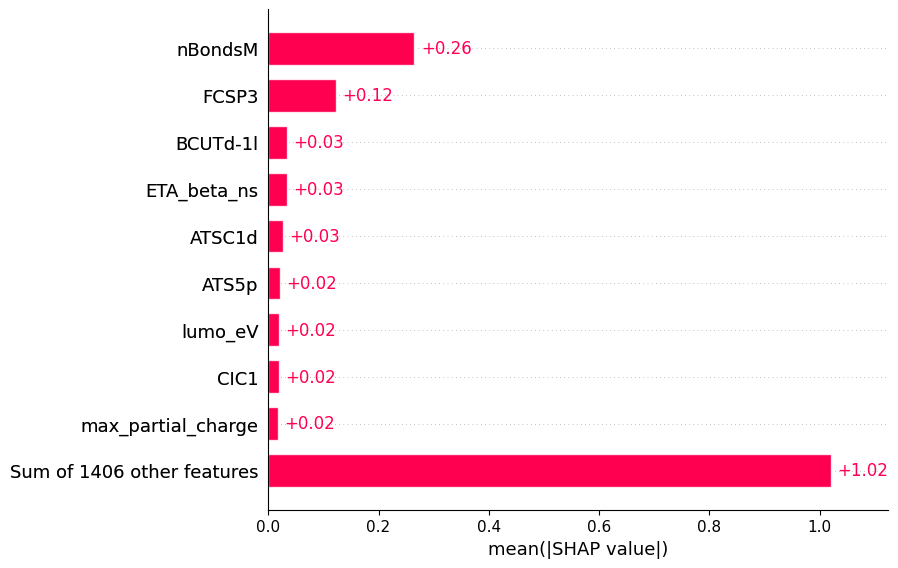

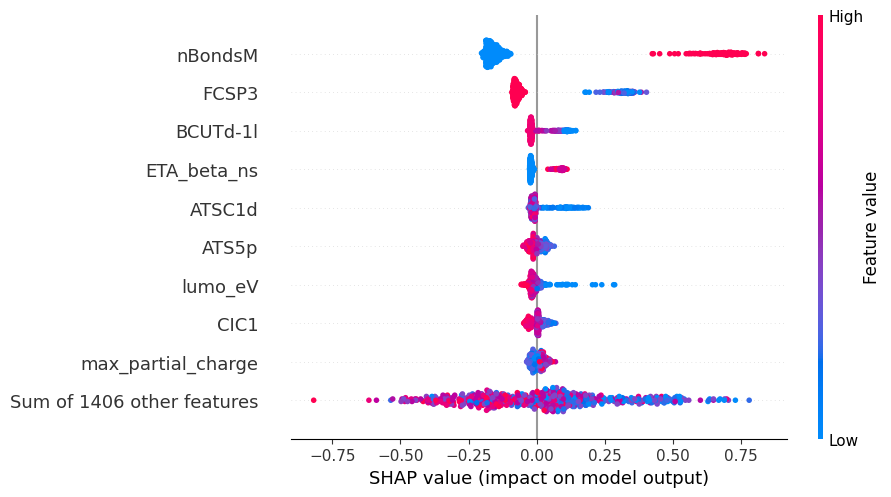

In [42]:
import shap

explainer = shap.Explainer(best_model, X_test_scaled, feature_names=X.columns)
shap_values = explainer(X_test_scaled)

shap.plots.bar(shap_values, max_display=10)
shap.plots.beeswarm(shap_values, max_display=10)

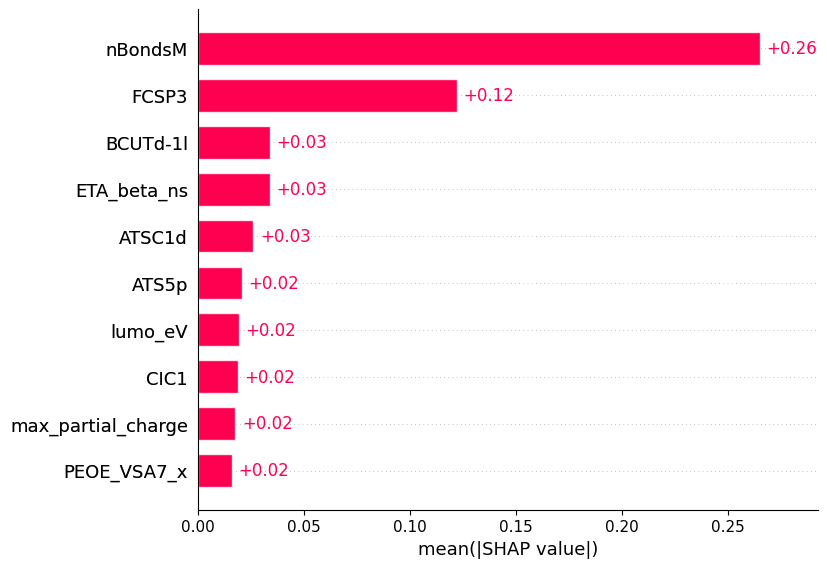

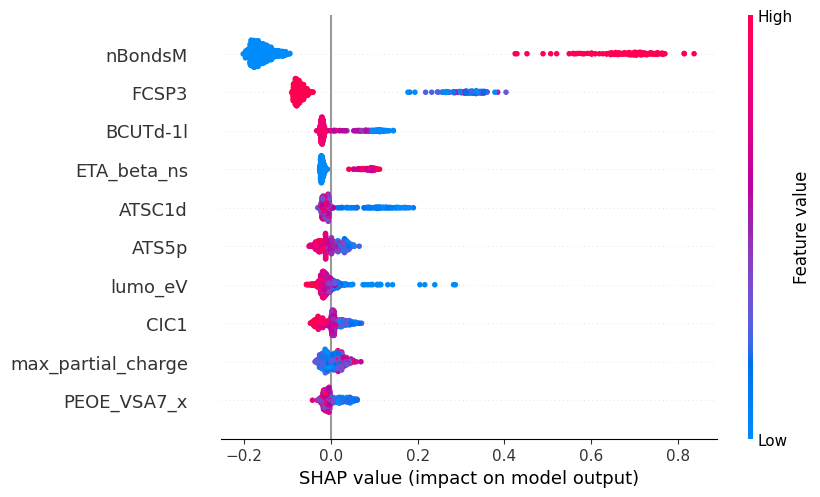

In [43]:
# Compute SHAP values
# explainer = shap.Explainer(model, X_test_scaled, feature_names=X.columns)
# shap_values = explainer(X_test_scaled)

# Get mean absolute SHAP values per feature and sort them
mean_shap = np.abs(shap_values.values).mean(axis=0)
top_10_indices = np.argsort(mean_shap)[-10:][::-1]

# Slice SHAP explanation to include only top 10 features
shap_values_top10 = shap.Explanation(
    values=shap_values.values[:, top_10_indices],
    base_values=shap_values.base_values,
    data=shap_values.data[:, top_10_indices],
    feature_names=np.array(shap_values.feature_names)[top_10_indices].tolist()
)

# Plot only top 10 features
shap.plots.bar(shap_values_top10)
shap.plots.beeswarm(shap_values_top10)

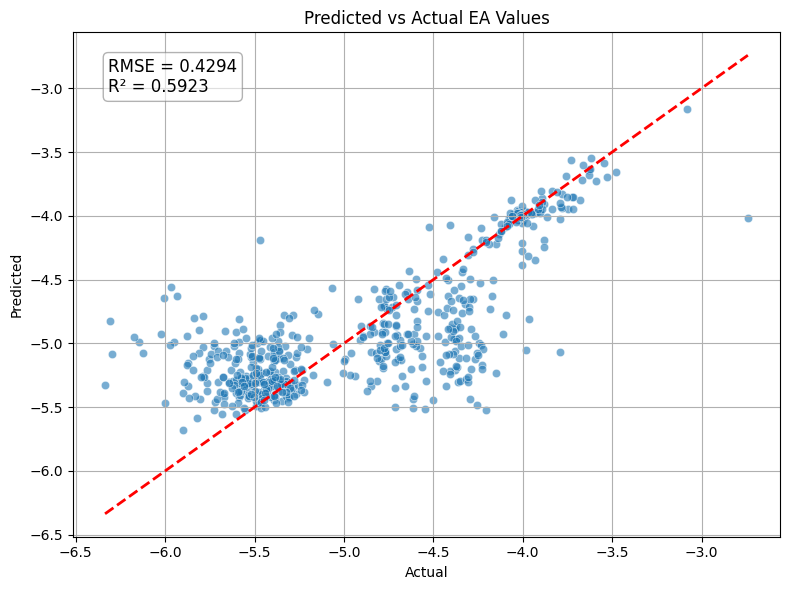

In [49]:
residuals = y_test - y_pred_orig

mse = mean_squared_error(y_test, y_pred_orig)
rmse = np.sqrt(mse)

import matplotlib.pyplot as plt
import seaborn as sns 

# --- A. Predicted vs Actual Plot ---
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_orig, alpha=0.6)

# Reference line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'r--', linewidth=2)

# Annotate RMSE and R² inside the plot
plt.text(
    0.05, 0.95,
    f"RMSE = {rmse:.4f}\nR² = {r2:.4f}",
    transform=plt.gca().transAxes,
    fontsize=12,
    verticalalignment='top',
    bbox=dict(boxstyle="round", fc="white", ec="gray", alpha=0.6)
)

plt.title("Predicted vs Actual EA Values")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

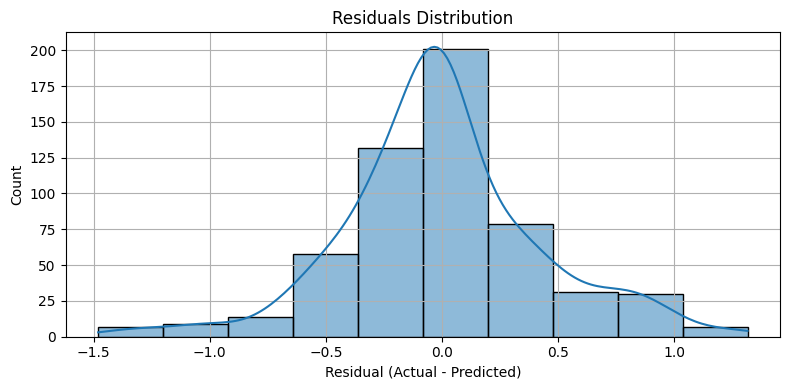

In [50]:
# --- B. Histogram of Residuals ---
plt.figure(figsize=(8, 4))
sns.histplot(residuals, kde=True, bins=10)
plt.title("Residuals Distribution")
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()

In [51]:
# Save the model to a JSON file
# model.save_model("xgb_ea_model.json")

C:\Users\nandi\AppData\Local\Temp\ipykernel_26660\2266881508.py:41: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


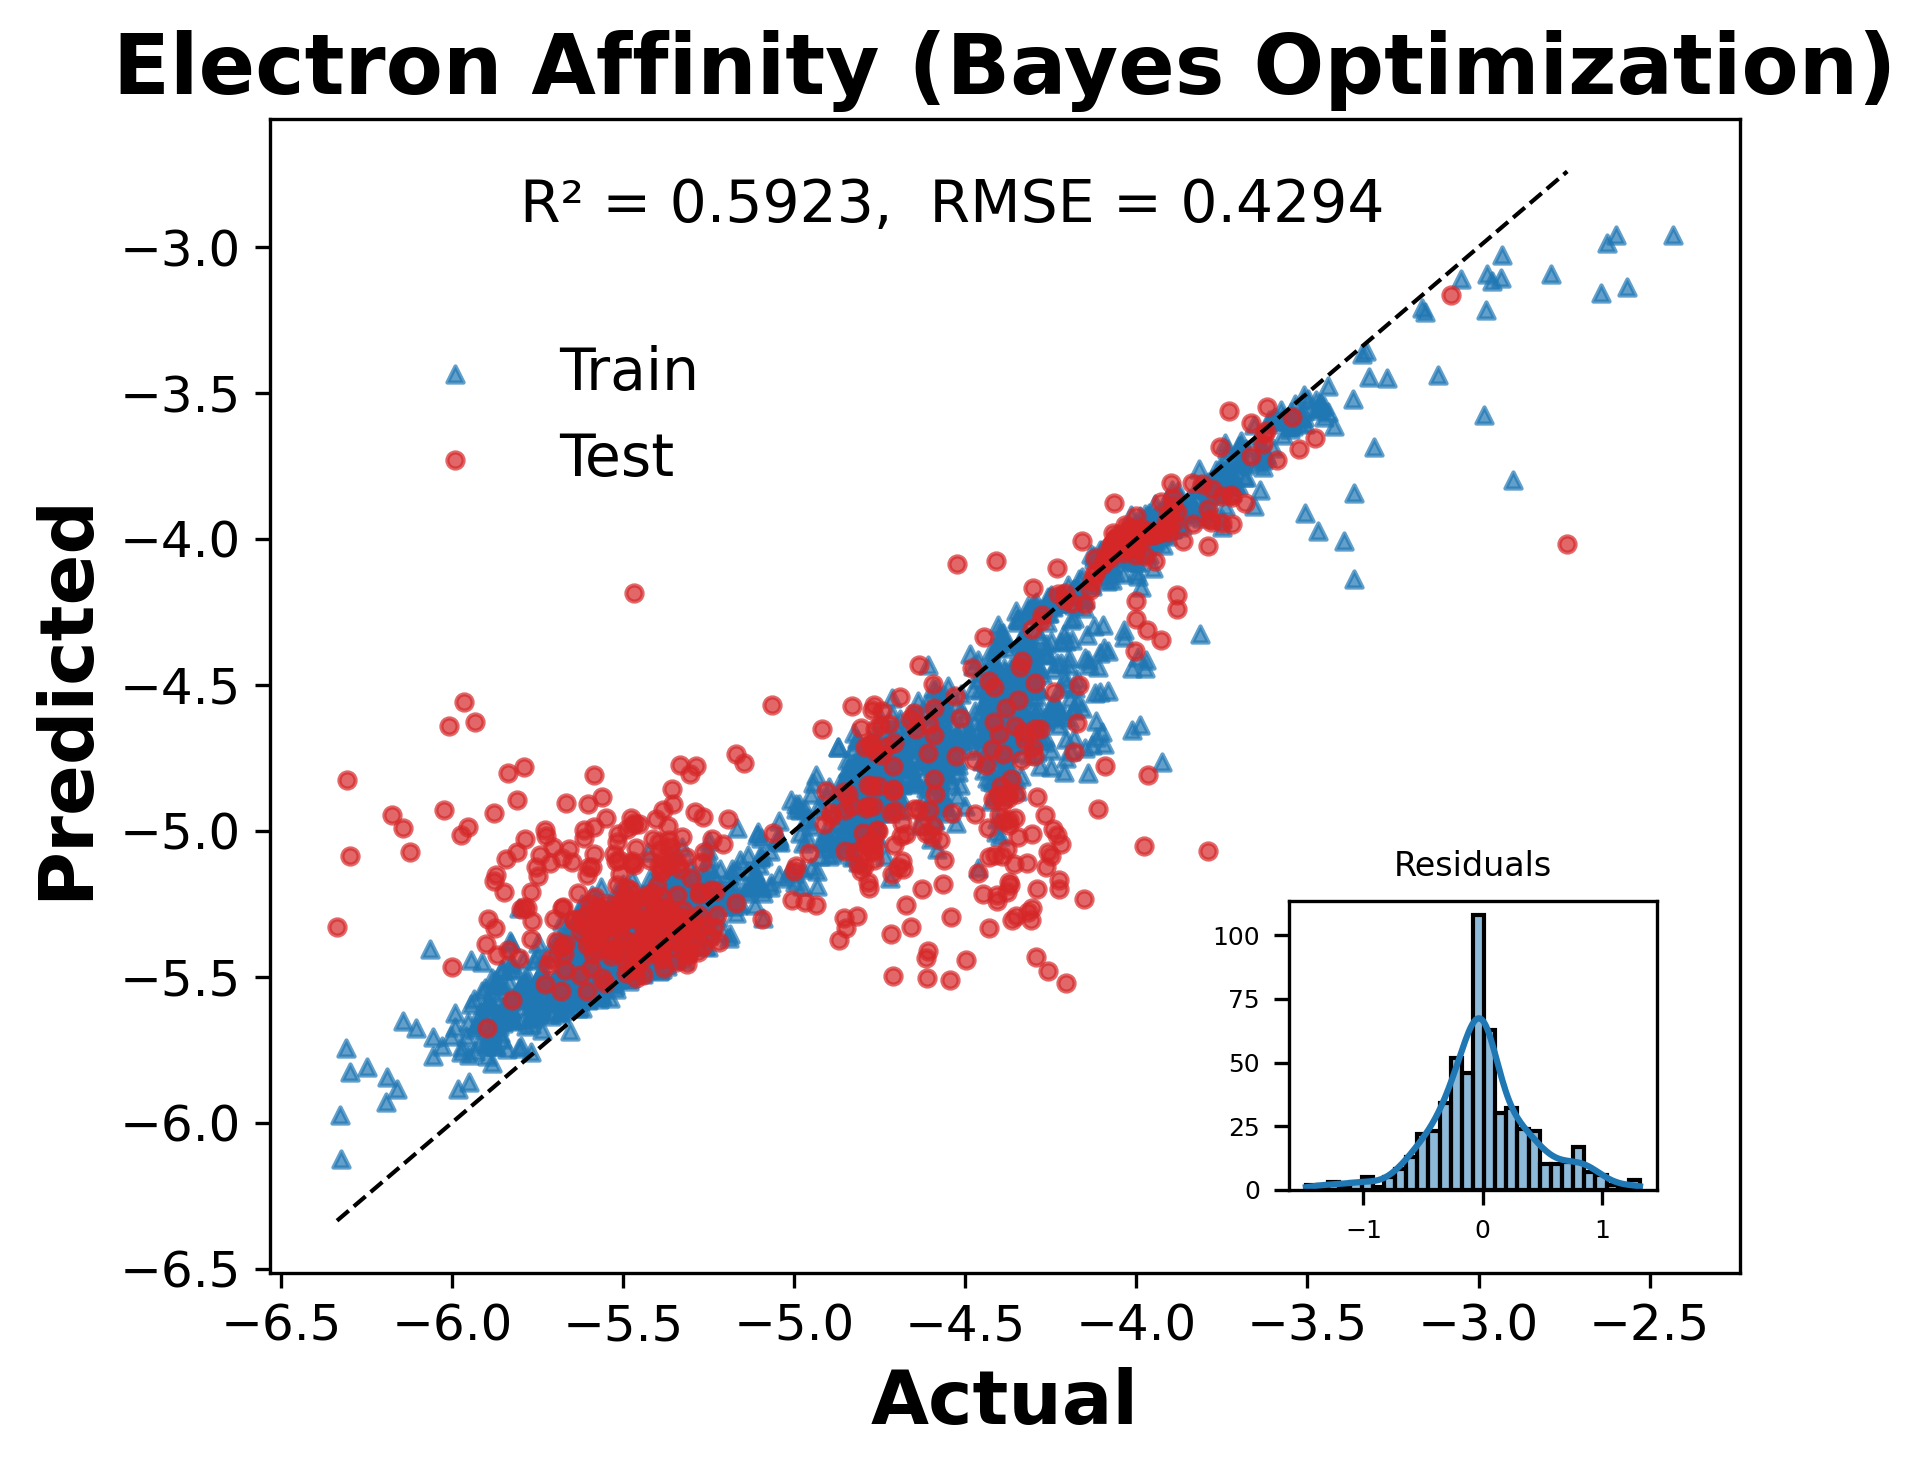

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# ➤ Create main plot with better layout engine
fig, ax = plt.subplots(figsize=(6, 5), dpi=300)

# ➤ Scatter: Train and Test
ax.scatter(y_train, y_pred_train, alpha=0.7, s=15, color='tab:blue', marker='^', label='Train')
ax.scatter(y_test, y_pred_orig, alpha=0.7, s=15, color='tab:red', marker='o', label='Test')

# ➤ Diagonal reference line
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', linewidth=1)

# ➤ Title and axes labels
ax.set_title("Electron Affinity (Bayes Optimization)", fontsize=20, fontweight='bold')
ax.set_xlabel("Actual", fontsize=18, fontweight='bold')
ax.set_ylabel("Predicted", fontsize=18, fontweight='bold')
ax.tick_params(axis='both', labelsize=12)

# ➤ Custom legend with performance metrics
# ax.legend(title=f"RMSE = {rmse:.4f}\nR² = {r2:.4f}", loc='upper left', fontsize=10, title_fontsize=10, frameon=False)

x_center = (y_test.min() + y_test.max()) / 2
# y_top = y_pred_orig.max() + (y_pred_orig.max() - y_pred_orig.min()) * 0.15
y_top = ax.get_ylim()[1] - 0.05 * (ax.get_ylim()[1] - ax.get_ylim()[0])
ax.text(x_center, y_top, f"R² = {r2:.4f},  RMSE = {rmse:.4f}",
        fontsize=14, ha='center', va='top')

# ➤ Legend
ax.legend(loc='upper left', bbox_to_anchor=(0.05, 0.85), fontsize=14, frameon=False)
# ➤ Inset residual plot
inset_ax = inset_axes(ax, width="25%", height="25%", loc='lower right', borderpad=2)
sns.histplot(residuals, bins=30, kde=True, ax=inset_ax)
inset_ax.set_title("Residuals", fontsize=8)
inset_ax.set_xlabel("")
inset_ax.set_ylabel("")
inset_ax.tick_params(labelsize=6)

# ➤ Save and display
plt.tight_layout()
plt.savefig("predicted_vs_actual_with_train_test.png", dpi=300, bbox_inches='tight')
plt.show()
